## Objetivo del módulo

Conocer el uso de la estructura de árboles binarios para la ordenación de datos

## Preguntas

- ¿Cómo se puede mantener ordenado un árbol binario?
- ¿Qué ventajas tendría mantenerlo ordenado?
- ¿Qué resultados dan los distintos tipos de recorridos sobre el árbol?
- ¿Cómo podemos mantener un árbol binario balanceado?

### Observa la siguiente implementación

- usamos explícitamente estructuras para almacenar un hijoz izquierdo y uno derecho
- tenemos un algoritmo para insertar elementos garantizando un cierto orden
- los recorridos sobre dicho orden nos producen listas ordenadas
- la complejidad computacional de cada operación

In [1]:
import numpy as np

class BTNode:
    
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left  = None
        self.right = None
        if left is not None:
            self.add_left(left)
        if right is not None:
            self.add_right(right)
    
    def add_left(self, value):
        assert self.left is None, "node already has left child"
        self.left  = self.__class__(value) if not isinstance(value,self.__class__) else value
        return self
        
    def add_right(self, value):
        assert self.right is None, "node already has right child"
        self.right  = self.__class__(value) if not isinstance(value,self.__class__) else value
        return self
    
    def swap_children(self):
        tmp = self.left
        self.left = self.right
        self.right = self.left
        return self
    
    def insert_ordered(self, new_value):
        if new_value < self.value:
            if self.left is None:
                self.add_left(new_value)
            else:
                self.left.insert_ordered(new_value)
        else:
            if self.right is None:
                self.add_right(new_value)
            else:
                self.right.insert_ordered(new_value)
        return self
    
    def ird(self):
        if self.value==None:
            return []
        s1 = self.left.ird() if self.left is not None else []
        s2 = self.right.ird() if self.right is not None else []
        return s1+[self.value]+s2    
    
    def to_indented_string(self, level, prefix=""):
        s = (" "*2*level + prefix + str(self.value) + "\n") if self.value is not None else ""
        s += self.left.to_indented_string(level+1, prefix="L: ") if self.left is not None else ""
        s += self.right.to_indented_string(level+1, prefix="R: ") if self.right is not None else ""
        return s       

    def __repr__(self):
        return self.to_indented_string(0)
 
    @classmethod
    def from_list(cls, a_list):
        r = cls(a_list[0])
        for i in a_list[1:]:
            r.insert_ordered(i)
        return r
    
    @classmethod
    def sort_list(cls, a_list):
        r = cls.from_list(a_list)
        return np.r_[r.ird()]

### podemos crear un árbol con un orden arbitrario

In [2]:
k=BTNode(10)\
    .add_right(BTNode(20)\
           .add_left(BTNode(15)\
                .add_left(91))\
           .add_right(21))\
    .add_left(12)
k

10
  L: 12
  R: 20
    L: 15
      L: 91
    R: 21

In [3]:
k.ird()

[12, 10, 91, 15, 20, 21]

### podemos crear un árbol manteniendo la siguiente propiedad:

- para cualquier nodo, su hijo izquierdo es menor y su hizo derecho es mayor

In [4]:
k = BTNode(10).insert_ordered(2).insert_ordered(12).insert_ordered(1).insert_ordered(4)
k

10
  L: 2
    L: 1
    R: 4
  R: 12

In [5]:
k = BTNode.from_list([10,2,12,1,4])
k

10
  L: 2
    L: 1
    R: 4
  R: 12

de modo que al recorrerlo nos produce una lista ordenada

In [6]:
k.ird()

[1, 2, 4, 10, 12]

In [10]:
BTNode.sort_list([10,43,12,1,-20])


array([-20,   1,  10,  12,  43])

In [15]:
np.random.permutation(100)[:10]

array([ 6,  0, 76, 95, 52, 74, 26, 54, 56, 24])

In [16]:
for _ in range(10):
    l = np.random.permutation(100)[:10]
    print l,"-->",
    print BTNode.sort_list(l)


[58 41 51 56 96 50 86 65 94 37] --> [37 41 50 51 56 58 65 86 94 96]
[61 92 51 97 68 13 63 71 43 73] --> [13 43 51 61 63 68 71 73 92 97]
[ 7 83 80 48 70  4 62 86 26 52] --> [ 4  7 26 48 52 62 70 80 83 86]
[ 8 79 37 42 48 30 47 62 19 53] --> [ 8 19 30 37 42 47 48 53 62 79]
[31 36 84 49  9 59 38 30 97 20] --> [ 9 20 30 31 36 38 49 59 84 97]
[41 46 61 17  5 34 88 32 96 47] --> [ 5 17 32 34 41 46 47 61 88 96]
[38  4 86 31 34 63 13 70 48 49] --> [ 4 13 31 34 38 48 49 63 70 86]
[89 91  1 53 12 60 40 45 10 51] --> [ 1 10 12 40 45 51 53 60 89 91]
[78 14 25 88 37 70 82 77 29 96] --> [14 25 29 37 70 77 78 82 88 96]
[82 84 68 10 54 93  6 62 58 61] --> [ 6 10 54 58 61 62 68 82 84 93]


observa que, en la lección anterior, **ordenábamos in situ** y ahora creamos una estructura nueva.

finalmente, medimos rendimiento

In [178]:
def experiment_insert_ordered(n):
    k = np.random.permutation(100*n)[:n]
    tree = BTNode(k[0])
    for i in k:
        tree.insert_ordered(i)
    return tree

def experiment_sort(n):
    k = np.random.permutation(100*n)[:n]
    BTNode.sort_list(k)

r_times_insert = []
r_times_ird = []
r_times_sort = []
n_list = np.arange(10,100,10)*100

print "running experiments"
for n in n_list:
    print ".",
    t = %timeit -r 3 -n 3 -o -q experiment_insert_ordered(n)
    r_times_insert.append(t.best)

    k = experiment_insert_ordered(n)
    t = %timeit -r 3 -n 3 -o -q k.ird()
    r_times_ird.append(t.best)

    t = %timeit -r 3 -n 3 -o -q experiment_sort(n)
    r_times_sort.append(t.best)
    
    

running experiments
. . . . . . . . .


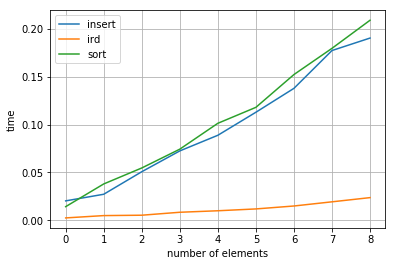

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r_times_insert, label="insert")
plt.plot(r_times_ird, label="ird")
plt.plot(r_times_sort, label="sort")
plt.ylabel("time")
plt.xlabel("number of elements")
plt.grid()
plt.legend()